# Logistic Regression with Newton's Method

### Written by: Dylan Hematillake; What is Logistic Regression?

Logistic regression is named after the logistic function. In linear regression, the dependent variable is continuous. It can have any one of the infinite number of possible values. Logistic Regression is when the response variable is categorical in nature, a discrete outcome.

The logistic function is also the sigmoid function as it is a S-shaped curve that takes a real value and maps it to a value between 0 and 1 but never exactly 0 and 1.

$$\sigma = \frac{1}{1+e^{-x}}$$

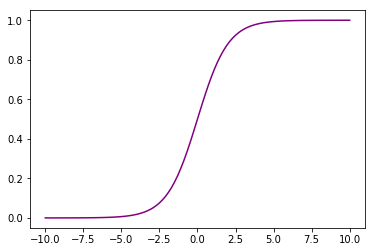

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from patsy import dmatrices
import warnings

def sigmoid(x):
    response = 1/(1+np.exp(-x))
    return response

x = np.linspace(-10,10,num=100)
plt.plot(x,sigmoid(x),color='purple')
plt.show()

The central premise of Logistic Regression is the assumption that your input space can be separated into two nice regions for each class by a linear boundary. The data must be seperable in n dimensions.

So, given a function:

$$\beta_o + \beta_1 x_1+\beta_2 x_2$$

To take a function that goes from $[-\infty,\infty]$ to a probability that goes from $[0,1]$ we use the odds function.

Let $P(X)$ denote the probability of an event $X$ occuring. The odds ratio, $OR(X)$ is defined as:

$$\frac{P(X)}{1-P(X)}$$

We can then define a general model:

$$logit(p_i)=log(\frac{p_i}{1-p_i})=\beta_o+\sum_{j=1}^J \beta_j x_{ji}$$

Where $p_i$ is the probability of event i, $\beta_o$ is the intercept, \beta_j are the coefficients (factors) and $x_{ji}$ are the variables of the factors.

Odds are used since the equation gives can give the largest range of coefficients such that the output is $[0,1]$.

The above boundary function still ranges from $[-\infty,\infty]$. So, we take the log of $OR(X)$, called the log-odds function as $log(OR(X))$ goes from $[-\infty,\infty]$ as $OR(X)$ goes from $[0,\infty]$

The impact of logistic regression is that we can no longer understand the prediction as a linear combination of the inputs as we can with linear regression. 

To calculate the boundary function, we calculate the Maximum Likelihood Estimation, MLE. In deep learning, MLE is backpropagation, defined as:
$$L(\theta(x))=f(X(\theta))$$

Newton's method can be used to find the minima and maxima.

### Why use Newton's Method for Optimization?

-  Newton's method converges faster than gradient descent when maximizing logistic regression log likelihood

-  Each iteration is more expensive than gradient descent because of calculating the inverse Hessian, defined as:

$${\mathbf  H}={\begin{bmatrix}{\dfrac  {\partial ^{2}f}{\partial x_{1}^{2}}}&{\dfrac  {\partial ^{2}f}{\partial x_{1}\,\partial x_{2}}}&\cdots &{\dfrac  {\partial ^{2}f}{\partial x_{1}\,\partial x_{n}}}\\[2.2ex]{\dfrac  {\partial ^{2}f}{\partial x_{2}\,\partial x_{1}}}&{\dfrac  {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &{\dfrac  {\partial ^{2}f}{\partial x_{2}\,\partial x_{n}}}\\[2.2ex]\vdots &\vdots &\ddots &\vdots \\[2.2ex]{\dfrac  {\partial ^{2}f}{\partial x_{n}\,\partial x_{1}}}&{\dfrac  {\partial ^{2}f}{\partial x_{n}\,\partial x_{2}}}&\cdots &{\dfrac  {\partial ^{2}f}{\partial x_{n}^{2}}}\end{bmatrix}}.$$

- As long as the data points are not very large, Newton's method is preferred for MLE

Regularization must be done as well, and is important in machine learning to prevent overfitting. A regularization term prevents coefficients to fit so perfectly as to overfit. L1 and L2 regularization vary be the method of norm they employ.

L1 Regularization of Least Squares:
$$\textbf{w*}=arg\min{\textbf{w}}\sum_j \big(t(\textbf{x}_j-\sum_i w_i h_i(\textbf{x}_j)\big)^2 + \lambda\sum_{i=1}^k|w_i|$$

L2 Regularization of Least Squares:
$$\textbf{w*}=arg\min{\textbf{w}}\sum_j \big(t(\textbf{x}_j-\sum_i w_i h_i(\textbf{x}_j)\big)^2 + \lambda\sum_{i=1}^k w_i^2$$

- L2 regularization is computationally efficient due to having analytic solutions while L1 is inefficient on non-sparse cases
- L2 regularization has non-sparse outputs while L1 has sparse outputs
- L2 regularization has no feature selection while L1 has built-in feature selection

In [66]:
#create play data

#set seed for reproducability 
np.random.seed(0)

#Define hyperparameters (model parameters)
#when to stop
tol = 1e-8
lam = None #12 regularization
max_iters=20
r = 0.95 #covariance between x and y, measure how two variables move together
n = 1000 #umber of observations in dataset to generate
sigma = 1 #variance of noise - data spead

#model settings
beta_x,beta_z,beta_v = -4,.9,1 #true beta coeff
var_x,var_z,var_v = 1, 1, 4 #variance of inpus

#model specification you want to fit
formula = 'y ~ x + z + v + np.exp(x) + I(v**2 + z)'

In [67]:
#generate and organize data
#multvariate normal is a generalized normal distribution to higher dimensions
#stochastic process (random). Define 3 random variables where x,z are related closely
warnings.filterwarnings("ignore")

x,z=np.random.multivariate_normal([0,0],[[var_x,r],[r,var_z]],n).T
v=np.random.normal(0,var_v,n)**3
A = pd.DataFrame({'x' : x,'z': z,'v' : v})
A['Log_Odds']=sigmoid(A[['x','z','v']].dot([beta_x,beta_z,beta_v])+sigma*np.random.normal(0,1,n))

#binomial random variable is the number of successes x in n repeated trails of a binomial experiment
A['y'] = [np.random.binomial(1,p) for p in A.Log_Odds]

y, X= dmatrices(formula,A,return_type='dataframe')

X.head()

,Intercept,x,z,v,np.exp(x),I(v ** 2 + z)
0,1.0,-1.805133,-1.678592,-230.536312,0.164453,53145.312449
1,1.0,-1.320743,-0.612110,-321.120883,0.266937,103118.009125
2,1.0,-1.689545,-1.998587,0.006285,0.184604,-1.998547
3,1.0,-0.914205,-0.962069,-56.335960,0.400835,3172.778273
4,1.0,0.036999,0.166842,-0.033775,1.037692,0.167983


In [68]:
#Algorithm setup

def catch_singularity(f):
    def silencer(*args,**kwargs):
        try:
            return f(*args,**kwargs)
        except np.linalg.LinAlgError:
            warnings.warn('Algorithm terminated - singular Hessian')
            return args[0]
    return silencer

### Single Newton Step

For Newton's method, a function $f(\beta)$ iteratively computs the following estimate:

$$\beta^+ = \beta - Hf(\beta)^{-1}\nabla f(\beta)$$

The Hessian of the log-likelihood for logistic regresion is given by:

$$Hf(\beta)=-X^TWX$$

With the gradient:
$$\nabla f(\beta)=X^T(y-p)$$
Where:
$$W := diag(p(1-p))$$

### Relation to Iteratively Reweighted Least Squares (IRLS)

For logistic regression, this step is equivalent to computing a weighted least squares estimator at each iteration where the method of least squares for estimating parameters by minimizing squared discrepancies between observed data and their expected values:

$$\beta^+=arg\min_\beta (z-X\beta)^TW(z-X\beta)$$

With $W$ as before and the adjusted response $z$ given by:

$$z := X\beta+W^{-1}(y-p)$$

In [69]:
@catch_singularity

def newton_step(curr,X,lam=None):
    #One naive step
    p=np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    W = np.diag((p*(1-p))[:,0])
    #hessian
    hessian = X.T.dot(W).dot(X)
    #gradient
    grad=X.T.dot(y-p)
    
    #regularization
    if lam:
        #return least-squares solution to a linear matrix eq. avoid calculating hessian to reduce computational expense
        step,*_=np.linalg.lstsq(hessian+lam*np.eye(curr,shape[0]),grad)
    else:
        step,*_=np.linalg.lstsq(hessian,grad)
        
    #update
    beta=curr+step
    
    return beta

In [70]:
def convergence(beta_old,beta_new,tol,iters):
    coef_change=np.abs(beta_old-beta_new)
    
    #if change hasn't reached threshold, keep training
    return not (np.any(coef_change>tol) & (iters < max_iters))

### Numerical Example
#### Standard Newton with Coefficient Convergence

In [71]:
#intial conditions

beta_old, beta=np.ones((len(X.columns),1)),np.zeros((len(X.columns),1))

#iterations
iters = 0
converged= False

while not converged:
    beta_old = beta
    beta = newton_step(beta,X,lam=lam)
    iters += 1
    converged = convergence(beta_old,beta,tol,iters)

print('Iterations : {}'.format(iters))
print('Beta: {}'.format(beta))

Iterations : 18
Beta: [[ 26321162.0240595 ]
 [ -6345604.88747682]
 [-11270766.29545255]
 [ -9577280.68635647]
 [ 20672279.24612887]
 [ -7783646.80695781]]
